In [ ]:
#Import the necessary libraries: Start by importing the required libraries for data manipulation and Naive Bayes algorithm implementation. Common libraries used in Python for this task include pandas, NumPy, and scikit-learn.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
sns.set_style("whitegrid")
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')

In [5]:
#Load Titanic Dataset
train = pd.read_csv("../input/titanic/train.csv")
test = pd.read_csv("../input/titanic/test.csv")

In [7]:
#Get detailed information about datasets
train.info()
print('=' * 40)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

Feature Engineering

In [8]:
#Get a view of data
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [9]:
#Get other description
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
#Remove unnecessary columns
train.drop(['PassengerId', 'Ticket'], axis=1, inplace=True)
test.drop(['Ticket'], axis=1, inplace=True)

# Machine Learning Algorithm Analysis

In [19]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier

In [20]:
#Divide data into input and target values
X_train = train.drop("Survived", axis=1)
y_train = train["Survived"]

#create dictionary to keep track of accuracies
Accuracy = {}

In [21]:
X_train.head(10)

,Pclass,Sex,Fare,Embarked,Title,AgeCategory,Family,FamilySize
0,3,0,7.2500,0,0,1,1,1
1,1,1,71.2833,1,1,1,1,1
2,3,1,7.9250,0,2,1,0,0
3,1,1,53.1000,0,1,1,1,1
4,3,0,8.0500,0,0,1,0,0
5,3,0,8.4583,2,0,3,0,0
6,1,0,51.8625,0,0,2,0,0
7,3,0,21.0750,0,3,0,1,1
8,3,1,11.1333,0,1,1,1,1
9,2,1,30.0708,1,1,0,1,1


In [22]:
X_train.describe()

,Pclass,Sex,Fare,Embarked,Title,AgeCategory,Family,FamilySize
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,0.352413,32.204208,0.361392,0.804714,1.342312,0.397306,0.450056
std,0.836071,0.477990,49.693429,0.635673,1.095455,0.936522,0.489615,0.594476
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,7.910400,0.000000,0.000000,1.000000,0.000000,0.000000
50%,3.000000,0.000000,14.454200,0.000000,0.000000,1.000000,0.000000,0.000000
75%,3.000000,1.000000,31.000000,1.000000,2.000000,2.000000,1.000000,1.000000
max,3.000000,1.000000,512.329200,2.000000,4.000000,3.000000,1.000000,2.000000


Gaussian Naive Bayes Accuracy : 0.7722114117130123
Multinomial Naive Bayes Accuracy : 0.7060762036281464
Bernoulli Naive Bayes Accuracy : 0.7912372104701526


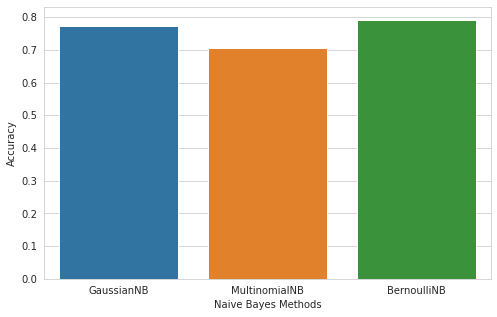

In [23]:
#Method - Naive Bayes 

#Titanic Dataset is evaluated against all methods in Naive Bayes to decide on best approach.

#Gaussian
GNB = GaussianNB()
scores = cross_val_score(GNB, X_train, y_train, cv=5)
accuracyGNB = scores.mean()
print("Gaussian Naive Bayes Accuracy :", accuracyGNB)

#Multinomial
MNB = MultinomialNB()
scores = cross_val_score(MNB, X_train, y_train, cv=5)
accuracyMNB = scores.mean()
print("Multinomial Naive Bayes Accuracy :", accuracyMNB)

#Bernoulli
BNB = BernoulliNB()
scores = cross_val_score(BNB, X_train, y_train, cv=5)
accuracyBNB = scores.mean()
print("Bernoulli Naive Bayes Accuracy :", accuracyBNB)

#Plot accuracies corresponding to various naive bayes methods
fig, ax1 = plt.subplots(1, 1, figsize=(8,5))
fig = sns.barplot(y=[accuracyGNB, accuracyMNB, accuracyBNB], x=["GaussianNB", "MultinomialNB", "BernoulliNB"], ax=ax1)
fig.set(xlabel="Naive Bayes Methods", ylabel="Accuracy")

#Finally we decide to use Bernoulli Naive Bayes
Accuracy["naiveBayes"] = accuracyBNB